# EDA - Exploratory Data Analysis
## ניתוח קובץ labels_enriched.csv

מחברת זו מבצעת ניתוח חקירתי של נתונים עבור פרויקט זיהוי דיכאון מתוך מסד הנתונים DAIC-WOZ.

In [43]:
# ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרות תצוגה
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# הגדרה לתמיכה בעברית (אם נדרש)
plt.rcParams['axes.unicode_minus'] = False

## 1. טעינת הנתונים

In [44]:
# טעינת הנתונים
df = pd.read_csv('../data/labels_enriched.csv')

# הצגת השורות הראשונות
print("5 השורות הראשונות:")
df.head()

5 השורות הראשונות:


,Participant_ID,PHQ_Binary,split,Depression_severity,gender,age
0,303,0,train,0,female,41
1,304,0,train,6,female,22
2,305,0,train,7,male,55
3,310,0,train,4,male,42
4,312,0,train,2,male,35


In [45]:
# הצגת השורות האחרונות

print("5 השורות האחרונות:")
df.tail()

5 השורות האחרונות:


,Participant_ID,PHQ_Binary,split,Depression_severity,gender,age
184,467,0,test,0,male,23
185,469,0,test,3,female,58
186,470,0,test,3,female,34
187,480,0,test,1,male,48
188,481,0,test,7,male,25


## 2. מידע בסיסי על הנתונים

In [46]:
# מידע כללי
print(f"מספר שורות: {len(df)}")
print(f"מספר עמודות: {len(df.columns)}")
print(f"\nשמות העמודות: {list(df.columns)}")

מספר שורות: 189
מספר עמודות: 6

שמות העמודות: ['Participant_ID', 'PHQ_Binary', 'split', 'Depression_severity', 'gender', 'age']


In [6]:
# סוגי הנתונים
print("סוגי נתונים לכל עמודה:")
df.dtypes

סוגי נתונים לכל עמודה:


Participant_ID          int64
PHQ_Binary              int64
split                  object
Depression_severity     int64
gender                 object
age                     int64
dtype: object

In [47]:
# מידע מפורט
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Participant_ID       189 non-null    int64 
 1   PHQ_Binary           189 non-null    int64 
 2   split                189 non-null    object
 3   Depression_severity  189 non-null    int64 
 4   gender               189 non-null    object
 5   age                  189 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.0+ KB


## 3. סטטיסטיקות תיאוריות

In [48]:
# סטטיסטיקות תיאוריות לעמודות מספריות
df.describe()

,Participant_ID,PHQ_Binary,Depression_severity,age
count,189.000000,189.000000,189.000000,189.000000
mean,395.947090,0.296296,6.746032,38.989418
std,56.117822,0.457836,5.924081,12.443485
min,300.000000,0.000000,0.000000,18.000000
25%,348.000000,0.000000,2.000000,29.000000
50%,396.000000,0.000000,5.000000,37.000000
75%,444.000000,1.000000,10.000000,50.000000
max,492.000000,1.000000,23.000000,65.000000


## 4. בדיקת ערכים חסרים

In [49]:
# ערכים חסרים לפי עמודה
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'ערכים חסרים': missing_values,
    'אחוז חסר': missing_percent
})

print("ערכים חסרים:")
print(missing_df)
print(f"\nסה\"כ ערכים חסרים: {df.isnull().sum().sum()}")

ערכים חסרים:
                     ערכים חסרים  אחוז חסר
Participant_ID                 0       0.0
PHQ_Binary                     0       0.0
split                          0       0.0
Depression_severity            0       0.0
gender                         0       0.0
age                            0       0.0

סה"כ ערכים חסרים: 0


## 5. התפלגות משתנה היעד (PHQ_Binary)

In [50]:
# ספירת ערכים
phq_counts = df['PHQ_Binary'].value_counts().sort_index()

print("התפלגות PHQ_Binary:")
print(f"  לא מדוכא (0): {phq_counts[0]} ({phq_counts[0]/len(df)*100:.1f}%)")
print(f"  מדוכא (1): {phq_counts[1]} ({phq_counts[1]/len(df)*100:.1f}%)")
print(f"\nיחס אי-איזון (Imbalance Ratio): {phq_counts[0]/phq_counts[1]:.2f}:1")

התפלגות PHQ_Binary:
  לא מדוכא (0): 133 (70.4%)
  מדוכא (1): 56 (29.6%)

יחס אי-איזון (Imbalance Ratio): 2.38:1


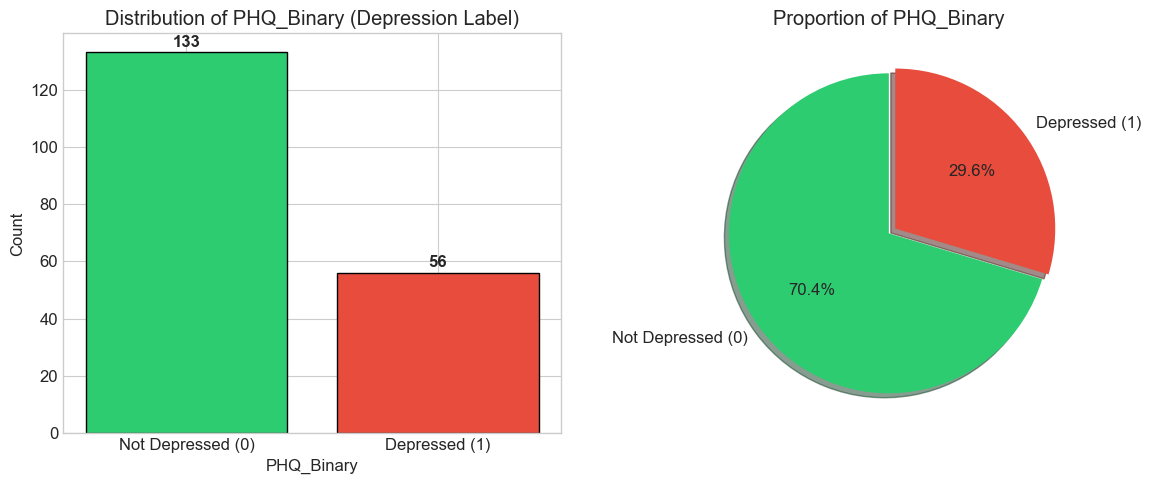

In [51]:
# ויזואליזציה - התפלגות PHQ_Binary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף עמודות
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Not Depressed (0)', 'Depressed (1)'], phq_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('PHQ_Binary')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of PHQ_Binary (Depression Label)')

# הוספת ערכים מעל העמודות
for bar, count in zip(bars, phq_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom', fontweight='bold')

# גרף עוגה
axes[1].pie(phq_counts.values, labels=['Not Depressed (0)', 'Depressed (1)'], 
            autopct='%1.1f%%', colors=colors, explode=(0, 0.05),
            shadow=True, startangle=90)
axes[1].set_title('Proportion of PHQ_Binary')

plt.tight_layout()
plt.show()

## 6. התפלגות לפי Split (Train/Dev/Test)

In [52]:
# ספירת ערכים לפי split
split_counts = df['split'].value_counts()
split_order = ['train', 'dev', 'test']
split_counts = split_counts.reindex(split_order)

print("התפלגות לפי Split:")
for split_name in split_order:
    count = split_counts[split_name]
    print(f"  {split_name}: {count} ({count/len(df)*100:.1f}%)")

התפלגות לפי Split:
  train: 107 (56.6%)
  dev: 35 (18.5%)
  test: 47 (24.9%)


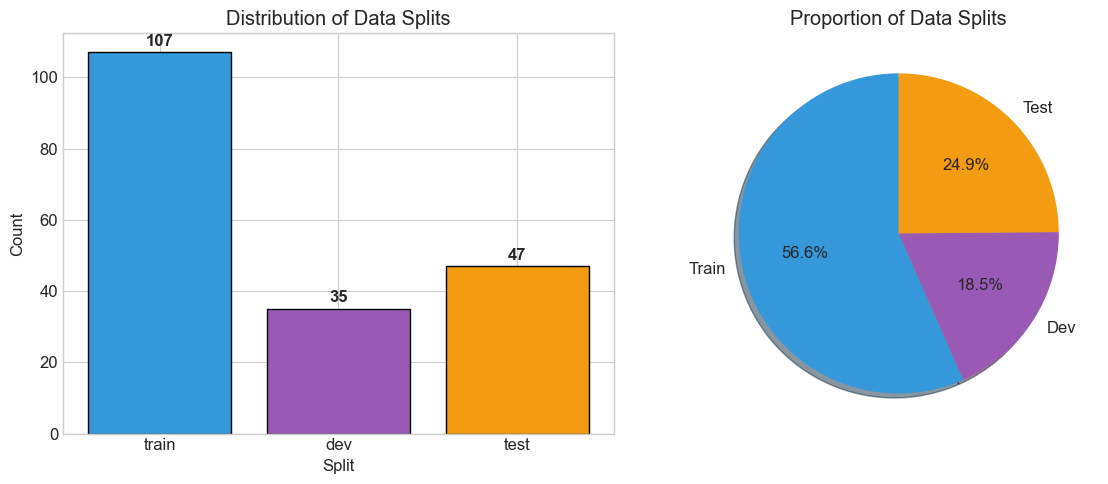

In [53]:
# ויזואליזציה - התפלגות Split
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף עמודות
colors_split = ['#3498db', '#9b59b6', '#f39c12']
bars = axes[0].bar(split_order, split_counts.values, color=colors_split, edgecolor='black')
axes[0].set_xlabel('Split')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Data Splits')

for bar, count in zip(bars, split_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom', fontweight='bold')

# גרף עוגה
axes[1].pie(split_counts.values, labels=['Train', 'Dev', 'Test'], 
            autopct='%1.1f%%', colors=colors_split, 
            shadow=True, startangle=90)
axes[1].set_title('Proportion of Data Splits')

plt.tight_layout()
plt.show()

## 7. התפלגות PHQ_Binary לפי Split

In [54]:
# טבלת הצלבה (Cross-tabulation)
cross_tab = pd.crosstab(df['split'], df['PHQ_Binary'], margins=True)
cross_tab.columns = ['Not Depressed (0)', 'Depressed (1)', 'Total']
cross_tab.index = ['dev', 'test', 'train', 'Total']

print("טבלת הצלבה - PHQ_Binary לפי Split:")
cross_tab

טבלת הצלבה - PHQ_Binary לפי Split:


,Not Depressed (0),Depressed (1),Total
dev,23,12,35
test,33,14,47
train,77,30,107
Total,133,56,189


In [55]:
# אחוז דיכאון לפי split
print("אחוז דיכאון (PHQ_Binary=1) לפי Split:")
print("-" * 40)
for split_name in ['train', 'dev', 'test']:
    split_df = df[df['split'] == split_name]
    total = len(split_df)
    depressed = split_df['PHQ_Binary'].sum()
    depression_rate = (depressed / total) * 100
    print(f"{split_name:6s}: {depressed:2d}/{total:2d} = {depression_rate:.1f}% מדוכאים")

אחוז דיכאון (PHQ_Binary=1) לפי Split:
----------------------------------------
train : 30/107 = 28.0% מדוכאים
dev   : 12/35 = 34.3% מדוכאים
test  : 14/47 = 29.8% מדוכאים


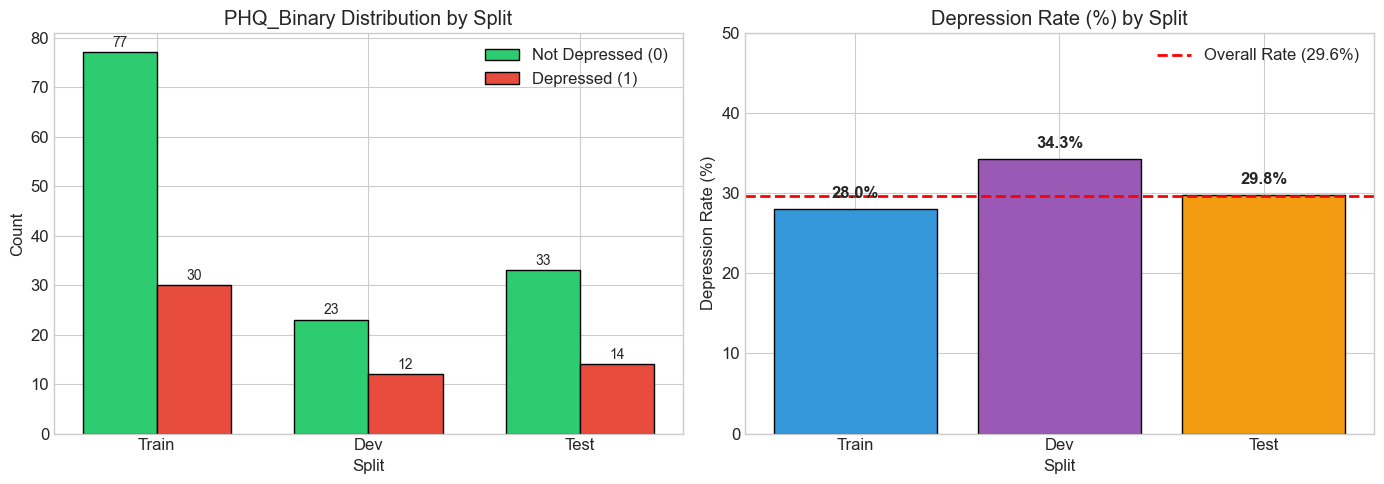

In [56]:
# ויזואליזציה - Stacked Bar Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# גרף עמודות מקובצות
split_order = ['train', 'dev', 'test']
x = np.arange(len(split_order))
width = 0.35

not_depressed = [len(df[(df['split'] == s) & (df['PHQ_Binary'] == 0)]) for s in split_order]
depressed = [len(df[(df['split'] == s) & (df['PHQ_Binary'] == 1)]) for s in split_order]

bars1 = axes[0].bar(x - width/2, not_depressed, width, label='Not Depressed (0)', color='#2ecc71', edgecolor='black')
bars2 = axes[0].bar(x + width/2, depressed, width, label='Depressed (1)', color='#e74c3c', edgecolor='black')

axes[0].set_xlabel('Split')
axes[0].set_ylabel('Count')
axes[0].set_title('PHQ_Binary Distribution by Split')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Train', 'Dev', 'Test'])
axes[0].legend()

# הוספת ערכים
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)
for bar in bars2:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# גרף אחוז דיכאון לפי split
depression_rates = [df[df['split'] == s]['PHQ_Binary'].mean() * 100 for s in split_order]
colors = ['#3498db', '#9b59b6', '#f39c12']
bars = axes[1].bar(['Train', 'Dev', 'Test'], depression_rates, color=colors, edgecolor='black')
axes[1].set_xlabel('Split')
axes[1].set_ylabel('Depression Rate (%)')
axes[1].set_title('Depression Rate (%) by Split')
axes[1].set_ylim(0, 50)

# קו ממוצע כללי
overall_rate = df['PHQ_Binary'].mean() * 100
axes[1].axhline(y=overall_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Rate ({overall_rate:.1f}%)')
axes[1].legend()

for bar, rate in zip(bars, depression_rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. ניתוח Participant_ID

In [57]:
# מידע על Participant_ID
print("מידע על Participant_ID:")
print("-" * 40)
print(f"מינימום: {df['Participant_ID'].min()}")
print(f"מקסימום: {df['Participant_ID'].max()}")
print(f"טווח: {df['Participant_ID'].max() - df['Participant_ID'].min()}")
print(f"ערכים ייחודיים: {df['Participant_ID'].nunique()}")
print(f"\nהאם יש כפילויות: {'כן' if df['Participant_ID'].duplicated().any() else 'לא'}")

מידע על Participant_ID:
----------------------------------------
מינימום: 300
מקסימום: 492
טווח: 192
ערכים ייחודיים: 189

האם יש כפילויות: לא


In [58]:
# בדיקת IDs חסרים (gaps)
all_ids = set(range(df['Participant_ID'].min(), df['Participant_ID'].max() + 1))
existing_ids = set(df['Participant_ID'])
missing_ids = sorted(all_ids - existing_ids)

print(f"מספר IDs חסרים בטווח: {len(missing_ids)}")
if len(missing_ids) <= 20:
    print(f"IDs חסרים: {missing_ids}")
else:
    print(f"IDs חסרים (20 ראשונים): {missing_ids[:20]}...")

מספר IDs חסרים בטווח: 4
IDs חסרים: [342, 394, 398, 460]


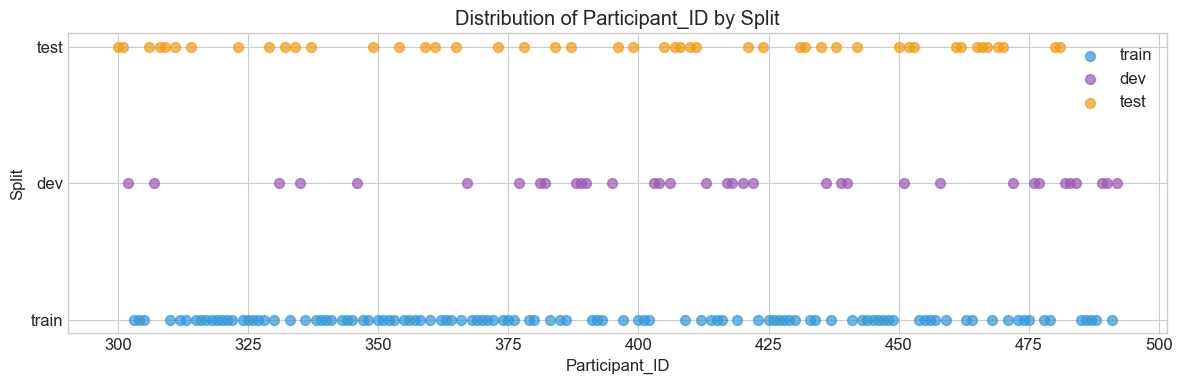

In [59]:
# התפלגות Participant_ID
fig, ax = plt.subplots(figsize=(12, 4))

colors_map = {'train': '#3498db', 'dev': '#9b59b6', 'test': '#f39c12'}
for split_name in ['train', 'dev', 'test']:
    split_df = df[df['split'] == split_name]
    ax.scatter(split_df['Participant_ID'], [split_name] * len(split_df), 
               c=[colors_map[split_name]], s=50, alpha=0.7, label=split_name)

ax.set_xlabel('Participant_ID')
ax.set_ylabel('Split')
ax.set_title('Distribution of Participant_ID by Split')
ax.legend()
plt.tight_layout()
plt.show()

## 9. ניתוח עמודת Age (גיל)

In [60]:
# סטטיסטיקות תיאוריות לגיל
print("סטטיסטיקות עבור עמודת Age:")
print("-" * 40)
print(f"ממוצע: {df['age'].mean():.1f}")
print(f"חציון: {df['age'].median():.1f}")
print(f"סטיית תקן: {df['age'].std():.1f}")
print(f"מינימום: {df['age'].min()}")
print(f"מקסימום: {df['age'].max()}")
print(f"טווח: {df['age'].max() - df['age'].min()}")

# סטטיסטיקות לפי קבוצת דיכאון
print("\n" + "=" * 40)
print("גיל ממוצע לפי מצב דיכאון:")
print("-" * 40)
for phq_val, label in [(0, 'לא מדוכא'), (1, 'מדוכא')]:
    mean_age = df[df['PHQ_Binary'] == phq_val]['age'].mean()
    std_age = df[df['PHQ_Binary'] == phq_val]['age'].std()
    print(f"  {label}: {mean_age:.1f} ± {std_age:.1f}")

סטטיסטיקות עבור עמודת Age:
----------------------------------------
ממוצע: 39.0
חציון: 37.0
סטיית תקן: 12.4
מינימום: 18
מקסימום: 65
טווח: 47

גיל ממוצע לפי מצב דיכאון:
----------------------------------------
  לא מדוכא: 39.0 ± 12.5
  מדוכא: 38.9 ± 12.5


C:\Users\rache\AppData\Local\Temp\ipykernel_25312\42210131.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot([df[df['PHQ_Binary'] == 0]['age'], df[df['PHQ_Binary'] == 1]['age']],


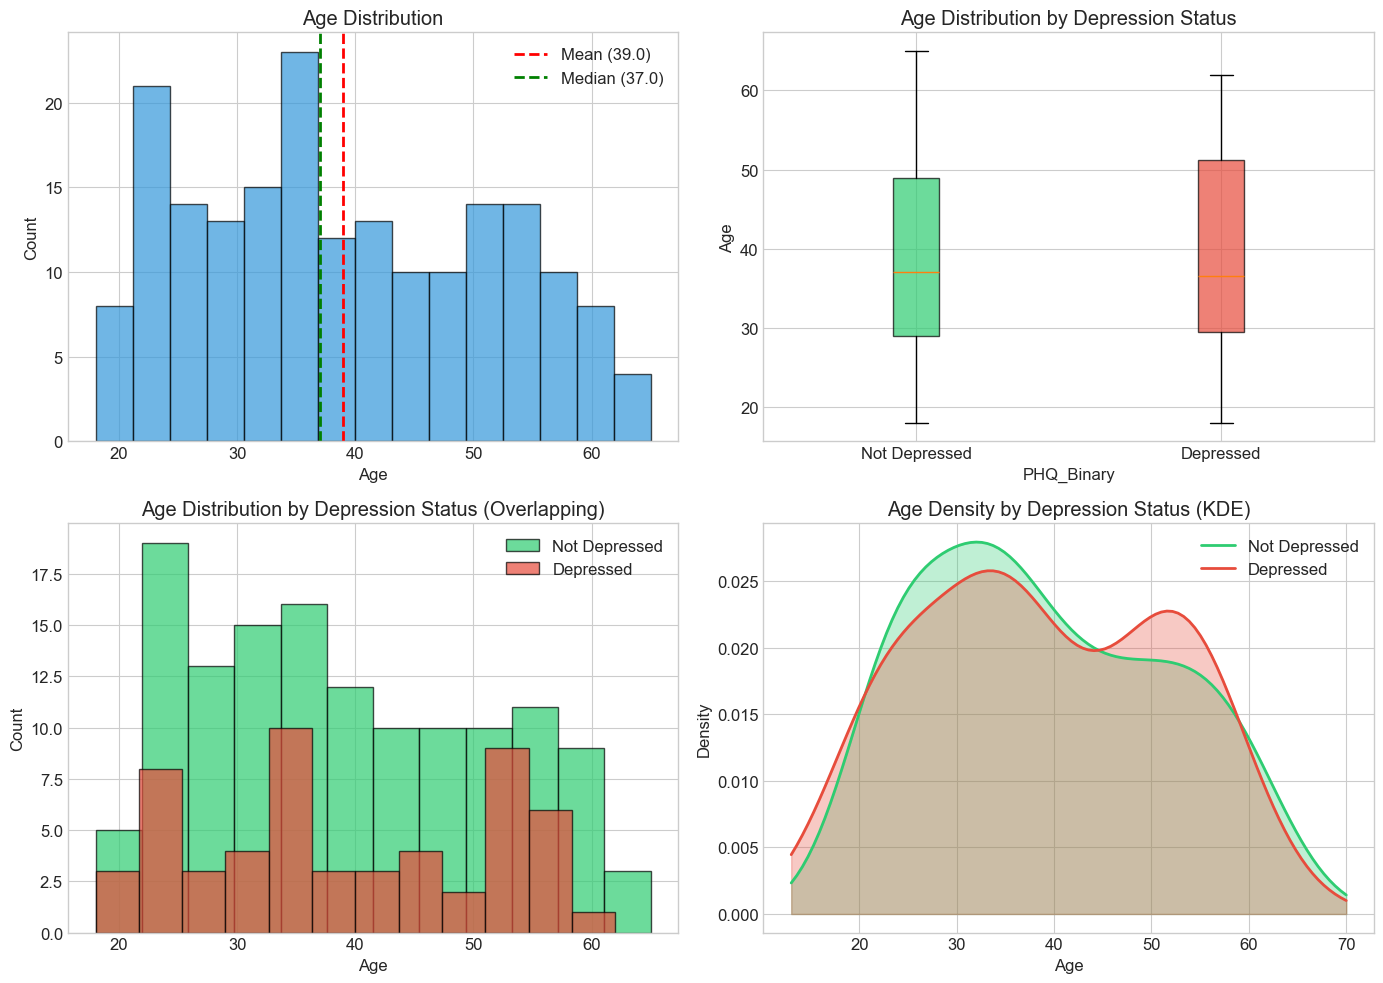

In [61]:
# ויזואליזציה - התפלגות גיל
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. היסטוגרמה של גיל
axes[0, 0].hist(df['age'], bins=15, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean ({df["age"].mean():.1f})')
axes[0, 0].axvline(df['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median ({df["age"].median():.1f})')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()

# 2. Boxplot של גיל לפי מצב דיכאון
df_plot = df.copy()
df_plot['PHQ_Label'] = df_plot['PHQ_Binary'].map({0: 'Not Depressed', 1: 'Depressed'})
colors = ['#2ecc71', '#e74c3c']
bp = axes[0, 1].boxplot([df[df['PHQ_Binary'] == 0]['age'], df[df['PHQ_Binary'] == 1]['age']],
                         labels=['Not Depressed', 'Depressed'], patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_xlabel('PHQ_Binary')
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_title('Age Distribution by Depression Status')

# 3. היסטוגרמה מפוצלת לפי מצב דיכאון
axes[1, 0].hist(df[df['PHQ_Binary'] == 0]['age'], bins=12, alpha=0.7, label='Not Depressed', color='#2ecc71', edgecolor='black')
axes[1, 0].hist(df[df['PHQ_Binary'] == 1]['age'], bins=12, alpha=0.7, label='Depressed', color='#e74c3c', edgecolor='black')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Age Distribution by Depression Status (Overlapping)')
axes[1, 0].legend()

# 4. KDE plot
from scipy import stats
age_range = np.linspace(df['age'].min() - 5, df['age'].max() + 5, 100)
for phq_val, color, label in [(0, '#2ecc71', 'Not Depressed'), (1, '#e74c3c', 'Depressed')]:
    age_data = df[df['PHQ_Binary'] == phq_val]['age']
    kde = stats.gaussian_kde(age_data)
    axes[1, 1].plot(age_range, kde(age_range), color=color, linewidth=2, label=label)
    axes[1, 1].fill_between(age_range, kde(age_range), alpha=0.3, color=color)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Age Density by Depression Status (KDE)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [62]:
# יצירת קבוצות גיל וניתוח שיעור דיכאון לפי קבוצת גיל
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 66], 
                          labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# ספירות לפי קבוצת גיל
age_group_counts = df['age_group'].value_counts().sort_index()
print("התפלגות לפי קבוצות גיל:")
print(age_group_counts)

# שיעור דיכאון לפי קבוצת גיל
print("\n" + "=" * 40)
print("שיעור דיכאון לפי קבוצת גיל:")
print("-" * 40)
depression_by_age = df.groupby('age_group')['PHQ_Binary'].agg(['sum', 'count', 'mean'])
depression_by_age.columns = ['Depressed', 'Total', 'Rate']
depression_by_age['Rate'] = depression_by_age['Rate'] * 100
print(depression_by_age)

התפלגות לפי קבוצות גיל:
age_group
18-25    35
26-35    52
36-45    39
46-55    41
56-65    22
Name: count, dtype: int64

שיעור דיכאון לפי קבוצת גיל:
----------------------------------------
           Depressed  Total       Rate
age_group                             
18-25             11     35  31.428571
26-35             15     52  28.846154
36-45             10     39  25.641026
46-55             15     41  36.585366
56-65              5     22  22.727273


C:\Users\rache\AppData\Local\Temp\ipykernel_25312\1700029610.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depression_by_age = df.groupby('age_group')['PHQ_Binary'].agg(['sum', 'count', 'mean'])


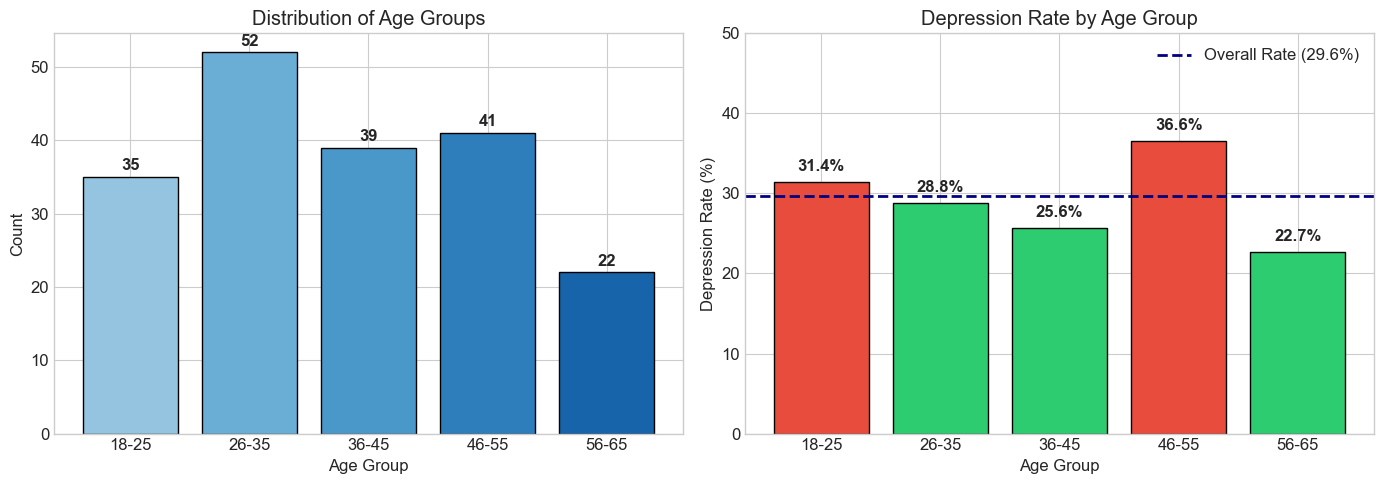

In [63]:
# ויזואליזציה - קבוצות גיל ודיכאון
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. התפלגות קבוצות גיל
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65']
counts = [age_group_counts[ag] for ag in age_groups]
colors_age = plt.cm.Blues(np.linspace(0.4, 0.8, len(age_groups)))
bars = axes[0].bar(age_groups, counts, color=colors_age, edgecolor='black')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Age Groups')

for bar, count in zip(bars, counts):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(count), ha='center', va='bottom', fontweight='bold')

# 2. שיעור דיכאון לפי קבוצת גיל
depression_rates = [df[df['age_group'] == ag]['PHQ_Binary'].mean() * 100 for ag in age_groups]
colors_rate = ['#e74c3c' if rate > df['PHQ_Binary'].mean() * 100 else '#2ecc71' for rate in depression_rates]
bars = axes[1].bar(age_groups, depression_rates, color=colors_rate, edgecolor='black')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Depression Rate (%)')
axes[1].set_title('Depression Rate by Age Group')
axes[1].set_ylim(0, 50)

# קו ממוצע כללי
overall_rate = df['PHQ_Binary'].mean() * 100
axes[1].axhline(y=overall_rate, color='navy', linestyle='--', linewidth=2, label=f'Overall Rate ({overall_rate:.1f}%)')
axes[1].legend()

for bar, rate in zip(bars, depression_rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 10. ניתוח עמודת Gender (מגדר)

In [64]:
# ספירת ערכים לפי מגדר
gender_counts = df['gender'].value_counts()

print("התפלגות לפי מגדר:")
print("-" * 40)
for gender in gender_counts.index:
    count = gender_counts[gender]
    print(f"  {gender}: {count} ({count/len(df)*100:.1f}%)")

# אחוז דיכאון לפי מגדר
print("\n" + "=" * 40)
print("שיעור דיכאון לפי מגדר:")
print("-" * 40)
for gender in ['female', 'male']:
    gender_df = df[df['gender'] == gender]
    total = len(gender_df)
    depressed = gender_df['PHQ_Binary'].sum()
    depression_rate = (depressed / total) * 100
    print(f"  {gender}: {depressed}/{total} = {depression_rate:.1f}% מדוכאים")

התפלגות לפי מגדר:
----------------------------------------
  male: 103 (54.5%)
  female: 86 (45.5%)

שיעור דיכאון לפי מגדר:
----------------------------------------
  female: 31/86 = 36.0% מדוכאים
  male: 25/103 = 24.3% מדוכאים


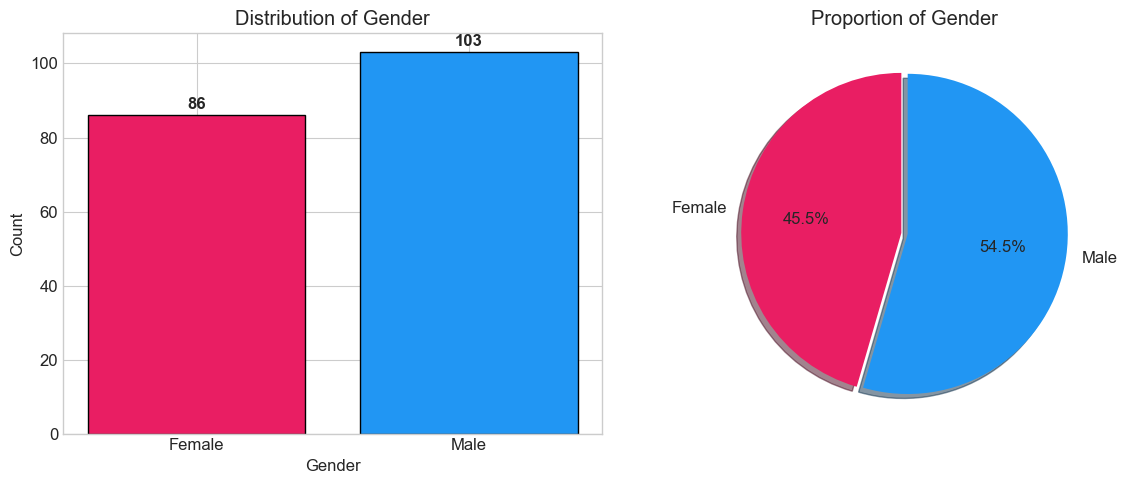

In [65]:
# ויזואליזציה - התפלגות מגדר
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. גרף עמודות - התפלגות מגדר
colors_gender = ['#e91e63', '#2196f3']  # pink for female, blue for male
gender_labels = ['Female', 'Male']
gender_values = [gender_counts.get('female', 0), gender_counts.get('male', 0)]
bars = axes[0].bar(gender_labels, gender_values, color=colors_gender, edgecolor='black')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Gender')

for bar, count in zip(bars, gender_values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom', fontweight='bold')

# 2. גרף עוגה
axes[1].pie(gender_values, labels=gender_labels, 
            autopct='%1.1f%%', colors=colors_gender, 
            explode=(0.02, 0.02), shadow=True, startangle=90)
axes[1].set_title('Proportion of Gender')

plt.tight_layout()
plt.show()

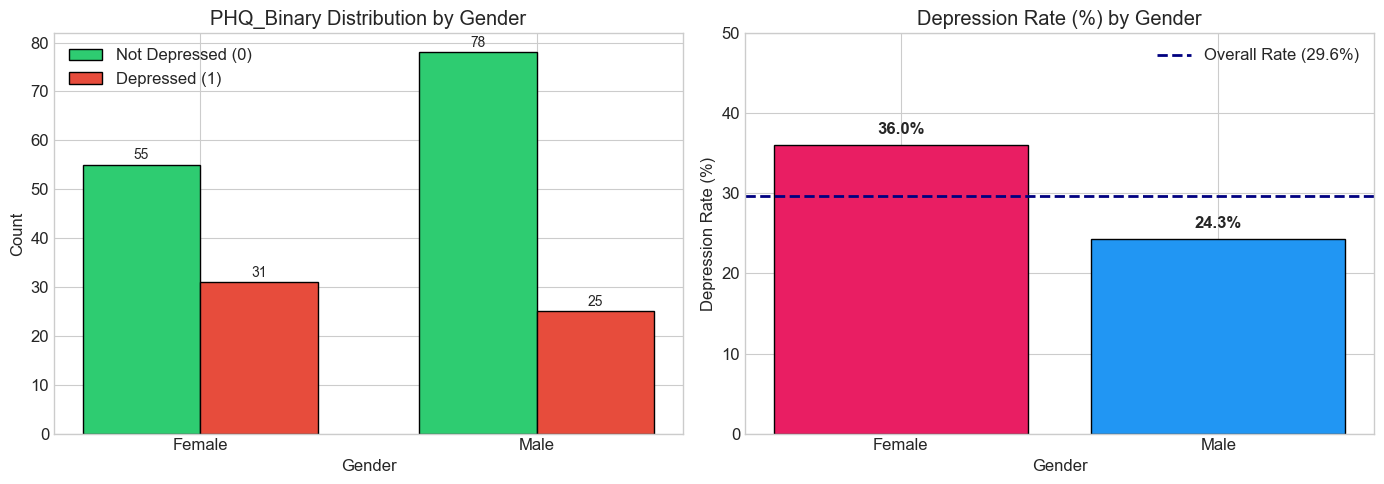

In [66]:
# ויזואליזציה - דיכאון לפי מגדר
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. גרף עמודות מקובצות - מגדר ומצב דיכאון
x = np.arange(2)
width = 0.35

not_depressed = [len(df[(df['gender'] == g) & (df['PHQ_Binary'] == 0)]) for g in ['female', 'male']]
depressed = [len(df[(df['gender'] == g) & (df['PHQ_Binary'] == 1)]) for g in ['female', 'male']]

bars1 = axes[0].bar(x - width/2, not_depressed, width, label='Not Depressed (0)', color='#2ecc71', edgecolor='black')
bars2 = axes[0].bar(x + width/2, depressed, width, label='Depressed (1)', color='#e74c3c', edgecolor='black')

axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('PHQ_Binary Distribution by Gender')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Female', 'Male'])
axes[0].legend()

for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)
for bar in bars2:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# 2. שיעור דיכאון לפי מגדר
depression_rates_gender = [df[df['gender'] == g]['PHQ_Binary'].mean() * 100 for g in ['female', 'male']]
bars = axes[1].bar(['Female', 'Male'], depression_rates_gender, color=colors_gender, edgecolor='black')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Depression Rate (%)')
axes[1].set_title('Depression Rate (%) by Gender')
axes[1].set_ylim(0, 50)

# קו ממוצע כללי
overall_rate = df['PHQ_Binary'].mean() * 100
axes[1].axhline(y=overall_rate, color='navy', linestyle='--', linewidth=2, label=f'Overall Rate ({overall_rate:.1f}%)')
axes[1].legend()

for bar, rate in zip(bars, depression_rates_gender):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [67]:
# טבלת הצלבה - מגדר ודיכאון
cross_tab_gender = pd.crosstab(df['gender'], df['PHQ_Binary'], margins=True)
cross_tab_gender.columns = ['Not Depressed (0)', 'Depressed (1)', 'Total']
cross_tab_gender.index = ['Female', 'Male', 'Total']

print("טבלת הצלבה - PHQ_Binary לפי Gender:")
cross_tab_gender

טבלת הצלבה - PHQ_Binary לפי Gender:


,Not Depressed (0),Depressed (1),Total
Female,55,31,86
Male,78,25,103
Total,133,56,189


C:\Users\rache\AppData\Local\Temp\ipykernel_25312\2759815488.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([df[df['gender'] == 'female']['age'], df[df['gender'] == 'male']['age']],


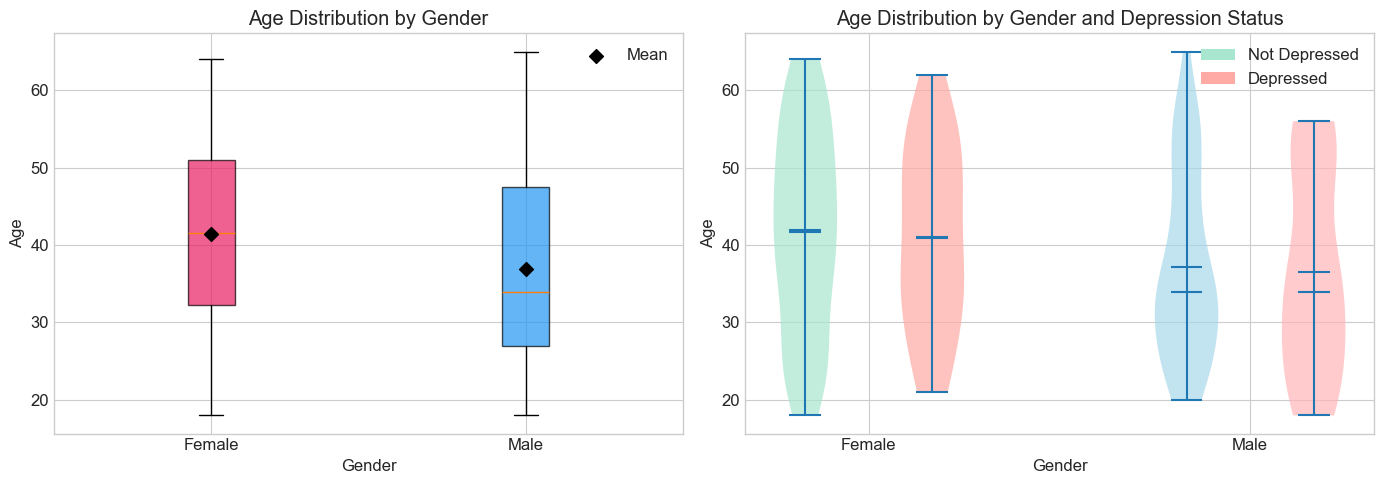

In [68]:
# גיל לפי מגדר
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Boxplot של גיל לפי מגדר
bp = axes[0].boxplot([df[df['gender'] == 'female']['age'], df[df['gender'] == 'male']['age']],
                      labels=['Female', 'Male'], patch_artist=True)
for patch, color in zip(bp['boxes'], colors_gender):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')
axes[0].set_title('Age Distribution by Gender')

# הוספת נקודות ממוצע
for i, gender in enumerate(['female', 'male']):
    mean_val = df[df['gender'] == gender]['age'].mean()
    axes[0].scatter(i + 1, mean_val, color='black', marker='D', s=50, zorder=3, label='Mean' if i == 0 else '')
axes[0].legend()

# 2. Violin plot - גיל לפי מגדר ומצב דיכאון
positions = [1, 2, 4, 5]
data = [
    df[(df['gender'] == 'female') & (df['PHQ_Binary'] == 0)]['age'],
    df[(df['gender'] == 'female') & (df['PHQ_Binary'] == 1)]['age'],
    df[(df['gender'] == 'male') & (df['PHQ_Binary'] == 0)]['age'],
    df[(df['gender'] == 'male') & (df['PHQ_Binary'] == 1)]['age']
]
colors_violin = ['#a8e6cf', '#ffaaa5', '#a8d8ea', '#ffb6b9']
vp = axes[1].violinplot(data, positions=positions, showmeans=True, showmedians=True)

for i, body in enumerate(vp['bodies']):
    body.set_facecolor(colors_violin[i])
    body.set_alpha(0.7)

axes[1].set_xticks([1.5, 4.5])
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution by Gender and Depression Status')

# הוספת legend מותאמת
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#a8e6cf', label='Not Depressed'),
                   Patch(facecolor='#ffaaa5', label='Depressed')]
axes[1].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

## 11. ניתוח עמודת Depression_severity (חומרת דיכאון)

In [69]:
# סטטיסטיקות תיאוריות ל-Depression_severity
print("סטטיסטיקות עבור עמודת Depression_severity:")
print("-" * 50)
print(f"ממוצע: {df['Depression_severity'].mean():.2f}")
print(f"חציון: {df['Depression_severity'].median():.1f}")
print(f"סטיית תקן: {df['Depression_severity'].std():.2f}")
print(f"מינימום: {df['Depression_severity'].min()}")
print(f"מקסימום: {df['Depression_severity'].max()}")
print(f"טווח: {df['Depression_severity'].max() - df['Depression_severity'].min()}")

# סטטיסטיקות לפי PHQ_Binary
print("\n" + "=" * 50)
print("Depression_severity לפי מצב דיכאון (PHQ_Binary):")
print("-" * 50)
for phq_val, label in [(0, 'לא מדוכא (0)'), (1, 'מדוכא (1)')]:
    subset = df[df['PHQ_Binary'] == phq_val]['Depression_severity']
    print(f"  {label}:")
    print(f"    ממוצע: {subset.mean():.2f} ± {subset.std():.2f}")
    print(f"    טווח: {subset.min()} - {subset.max()}")

סטטיסטיקות עבור עמודת Depression_severity:
--------------------------------------------------
ממוצע: 6.75
חציון: 5.0
סטיית תקן: 5.92
מינימום: 0
מקסימום: 23
טווח: 23

Depression_severity לפי מצב דיכאון (PHQ_Binary):
--------------------------------------------------
  לא מדוכא (0):
    ממוצע: 3.52 ± 2.97
    טווח: 0 - 10
  מדוכא (1):
    ממוצע: 14.41 ± 3.71
    טווח: 10 - 23


In [70]:
# הגדרת קטגוריות חומרה לפי PHQ-8 scoring
# 0-4: None/Minimal, 5-9: Mild, 10-14: Moderate, 15-19: Moderately Severe, 20+: Severe
def get_severity_category(score):
    if score <= 4:
        return 'None/Minimal (0-4)'
    elif score <= 9:
        return 'Mild (5-9)'
    elif score <= 14:
        return 'Moderate (10-14)'
    elif score <= 19:
        return 'Moderately Severe (15-19)'
    else:
        return 'Severe (20+)'

df['severity_category'] = df['Depression_severity'].apply(get_severity_category)

# סדר הקטגוריות
category_order = ['None/Minimal (0-4)', 'Mild (5-9)', 'Moderate (10-14)', 
                  'Moderately Severe (15-19)', 'Severe (20+)']

severity_counts = df['severity_category'].value_counts().reindex(category_order).fillna(0).astype(int)

print("התפלגות לפי קטגוריות חומרת דיכאון (PHQ-8 scoring):")
print("-" * 50)
for cat in category_order:
    count = severity_counts[cat]
    pct = count / len(df) * 100
    print(f"  {cat}: {count} ({pct:.1f}%)")

התפלגות לפי קטגוריות חומרת דיכאון (PHQ-8 scoring):
--------------------------------------------------
  None/Minimal (0-4): 86 (45.5%)
  Mild (5-9): 46 (24.3%)
  Moderate (10-14): 30 (15.9%)
  Moderately Severe (15-19): 20 (10.6%)
  Severe (20+): 7 (3.7%)


C:\Users\rache\AppData\Local\Temp\ipykernel_25312\366825580.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot([df[df['PHQ_Binary'] == 0]['Depression_severity'],


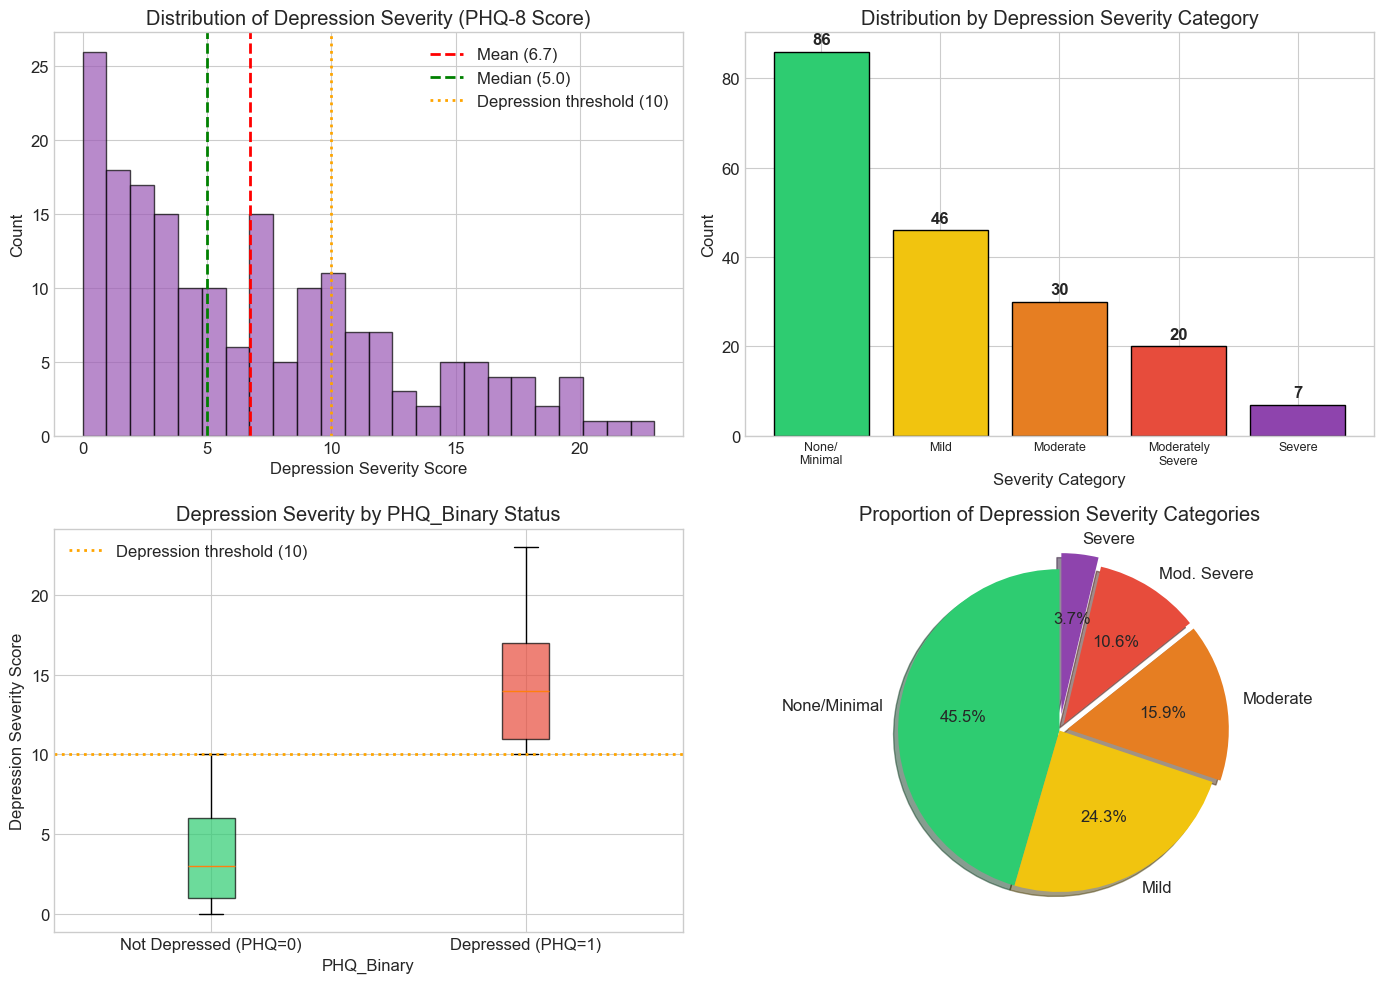

In [71]:
# ויזואליזציה - התפלגות Depression_severity
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. היסטוגרמה של Depression_severity
axes[0, 0].hist(df['Depression_severity'], bins=24, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Depression_severity'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean ({df["Depression_severity"].mean():.1f})')
axes[0, 0].axvline(df['Depression_severity'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median ({df["Depression_severity"].median():.1f})')
# קו סף לדיכאון (PHQ >= 10)
axes[0, 0].axvline(10, color='orange', linestyle=':', linewidth=2, label='Depression threshold (10)')
axes[0, 0].set_xlabel('Depression Severity Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Depression Severity (PHQ-8 Score)')
axes[0, 0].legend()

# 2. גרף עמודות לקטגוריות חומרה
colors_severity = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c', '#8e44ad']
bars = axes[0, 1].bar(range(len(category_order)), severity_counts.values, color=colors_severity, edgecolor='black')
axes[0, 1].set_xticks(range(len(category_order)))
axes[0, 1].set_xticklabels(['None/\nMinimal', 'Mild', 'Moderate', 'Moderately\nSevere', 'Severe'], fontsize=9)
axes[0, 1].set_xlabel('Severity Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution by Depression Severity Category')

for bar, count in zip(bars, severity_counts.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    str(count), ha='center', va='bottom', fontweight='bold')

# 3. Boxplot לפי PHQ_Binary
colors_phq = ['#2ecc71', '#e74c3c']
bp = axes[1, 0].boxplot([df[df['PHQ_Binary'] == 0]['Depression_severity'], 
                          df[df['PHQ_Binary'] == 1]['Depression_severity']],
                         labels=['Not Depressed (PHQ=0)', 'Depressed (PHQ=1)'], patch_artist=True)
for patch, color in zip(bp['boxes'], colors_phq):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].axhline(10, color='orange', linestyle=':', linewidth=2, label='Depression threshold (10)')
axes[1, 0].set_xlabel('PHQ_Binary')
axes[1, 0].set_ylabel('Depression Severity Score')
axes[1, 0].set_title('Depression Severity by PHQ_Binary Status')
axes[1, 0].legend()

# 4. גרף עוגה לקטגוריות חומרה
axes[1, 1].pie(severity_counts.values, labels=['None/Minimal', 'Mild', 'Moderate', 'Mod. Severe', 'Severe'], 
               autopct='%1.1f%%', colors=colors_severity, 
               explode=(0, 0, 0.05, 0.05, 0.1), shadow=True, startangle=90)
axes[1, 1].set_title('Proportion of Depression Severity Categories')

plt.tight_layout()
plt.show()

C:\Users\rache\AppData\Local\Temp\ipykernel_25312\3931508828.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([df[df['gender'] == 'female']['Depression_severity'],


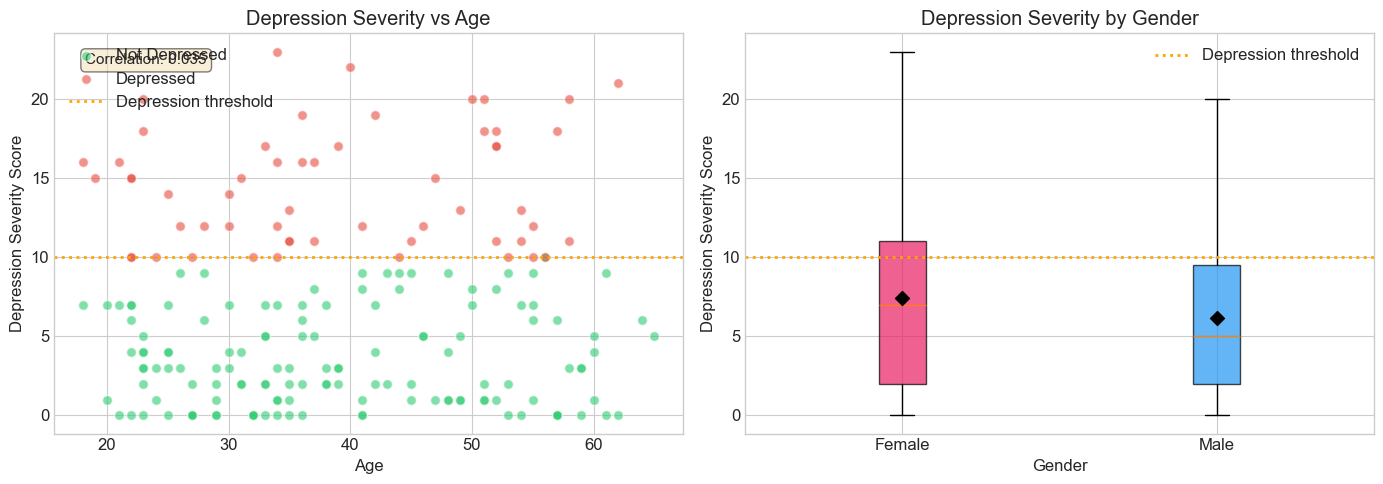


Depression Severity לפי מגדר:
----------------------------------------
  female: ממוצע = 7.42 ± 6.41
  male: ממוצע = 6.18 ± 5.45


In [72]:
# קורלציה בין Depression_severity למשתנים אחרים
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Scatter plot - Depression_severity vs Age
for phq_val, color, label in [(0, '#2ecc71', 'Not Depressed'), (1, '#e74c3c', 'Depressed')]:
    subset = df[df['PHQ_Binary'] == phq_val]
    axes[0].scatter(subset['age'], subset['Depression_severity'], 
                    c=color, alpha=0.6, label=label, s=50, edgecolor='white')
axes[0].axhline(10, color='orange', linestyle=':', linewidth=2, label='Depression threshold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Depression Severity Score')
axes[0].set_title('Depression Severity vs Age')
axes[0].legend()

# חישוב קורלציה
corr_age = df['Depression_severity'].corr(df['age'])
axes[0].text(0.05, 0.95, f'Correlation: {corr_age:.3f}', transform=axes[0].transAxes, 
             fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Boxplot - Depression_severity לפי מגדר
bp = axes[1].boxplot([df[df['gender'] == 'female']['Depression_severity'], 
                       df[df['gender'] == 'male']['Depression_severity']],
                      labels=['Female', 'Male'], patch_artist=True)
colors_gender = ['#e91e63', '#2196f3']
for patch, color in zip(bp['boxes'], colors_gender):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].axhline(10, color='orange', linestyle=':', linewidth=2, label='Depression threshold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Depression Severity Score')
axes[1].set_title('Depression Severity by Gender')

# הוספת ממוצעים
for i, gender in enumerate(['female', 'male']):
    mean_val = df[df['gender'] == gender]['Depression_severity'].mean()
    axes[1].scatter(i + 1, mean_val, color='black', marker='D', s=50, zorder=3)
axes[1].legend()

plt.tight_layout()
plt.show()

# הדפסת סטטיסטיקות לפי מגדר
print("\nDepression Severity לפי מגדר:")
print("-" * 40)
for gender in ['female', 'male']:
    subset = df[df['gender'] == gender]['Depression_severity']
    print(f"  {gender}: ממוצע = {subset.mean():.2f} ± {subset.std():.2f}")

C:\Users\rache\AppData\Local\Temp\ipykernel_25312\2619260554.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([df[df['split'] == s]['Depression_severity'] for s in split_order],


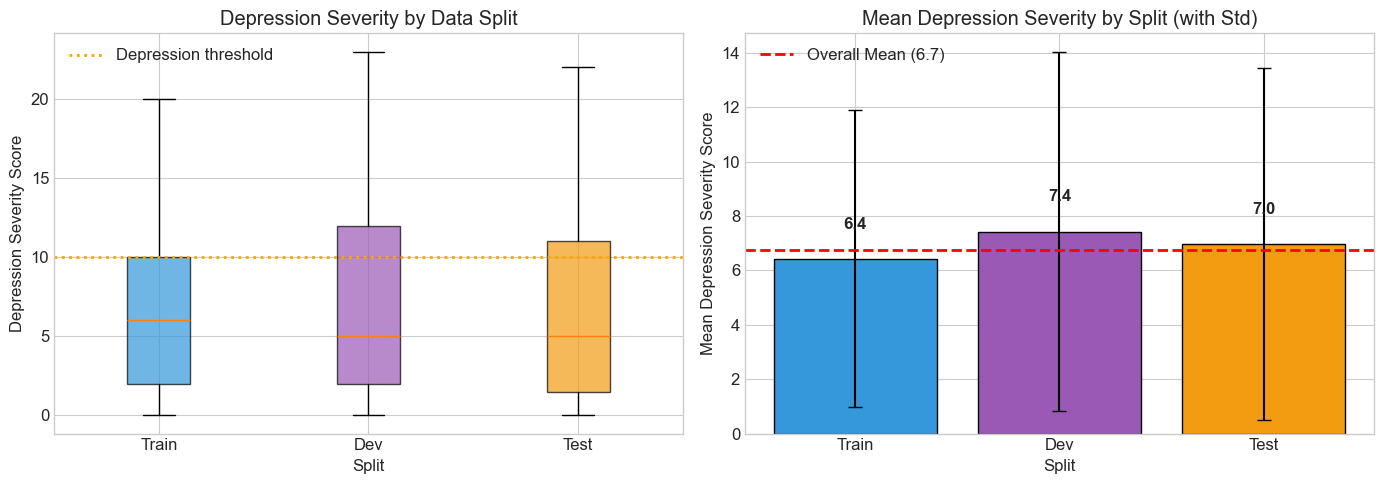


סיכום Depression_severity לפי Split:
--------------------------------------------------
  train : ממוצע = 6.42, חציון = 6.0, סטייה = 5.46
  dev   : ממוצע = 7.43, חציון = 5.0, סטייה = 6.59
  test  : ממוצע = 6.98, חציון = 5.0, סטייה = 6.47


In [73]:
# Depression_severity לפי Split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Boxplot לפי split
split_order = ['train', 'dev', 'test']
colors_split = ['#3498db', '#9b59b6', '#f39c12']
bp = axes[0].boxplot([df[df['split'] == s]['Depression_severity'] for s in split_order],
                      labels=['Train', 'Dev', 'Test'], patch_artist=True)
for patch, color in zip(bp['boxes'], colors_split):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].axhline(10, color='orange', linestyle=':', linewidth=2, label='Depression threshold')
axes[0].set_xlabel('Split')
axes[0].set_ylabel('Depression Severity Score')
axes[0].set_title('Depression Severity by Data Split')
axes[0].legend()

# 2. ממוצע Depression_severity לפי split
mean_severity = [df[df['split'] == s]['Depression_severity'].mean() for s in split_order]
std_severity = [df[df['split'] == s]['Depression_severity'].std() for s in split_order]
bars = axes[1].bar(['Train', 'Dev', 'Test'], mean_severity, yerr=std_severity, 
                   color=colors_split, edgecolor='black', capsize=5)
axes[1].axhline(df['Depression_severity'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Overall Mean ({df["Depression_severity"].mean():.1f})')
axes[1].set_xlabel('Split')
axes[1].set_ylabel('Mean Depression Severity Score')
axes[1].set_title('Mean Depression Severity by Split (with Std)')
axes[1].legend()

for bar, mean in zip(bars, mean_severity):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# טבלת סיכום
print("\nסיכום Depression_severity לפי Split:")
print("-" * 50)
for split_name in split_order:
    subset = df[df['split'] == split_name]['Depression_severity']
    print(f"  {split_name:6s}: ממוצע = {subset.mean():.2f}, חציון = {subset.median():.1f}, סטייה = {subset.std():.2f}")

## 12. סיכום

In [74]:
print("=" * 65)
print("סיכום EDA - labels_enriched.csv")
print("=" * 65)

# חישוב סטטיסטיקות
female_rate = df[df['gender'] == 'female']['PHQ_Binary'].mean() * 100
male_rate = df[df['gender'] == 'male']['PHQ_Binary'].mean() * 100
female_count = len(df[df['gender'] == 'female'])
male_count = len(df[df['gender'] == 'male'])

print(f"""
1. גודל הנתונים:
   - סה"כ משתתפים: {len(df)}
   - עמודות מקוריות: Participant_ID, PHQ_Binary, split, Depression_severity, gender, age

2. איכות הנתונים:
   - ערכים חסרים: 0
   - כפילויות: {'יש' if df['Participant_ID'].duplicated().any() else 'אין'}

3. התפלגות משתנה היעד (PHQ_Binary):
   - לא מדוכא (0): {phq_counts[0]} ({phq_counts[0]/len(df)*100:.1f}%)
   - מדוכא (1): {phq_counts[1]} ({phq_counts[1]/len(df)*100:.1f}%)
   - יחס אי-איזון: {phq_counts[0]/phq_counts[1]:.2f}:1

4. חלוקת הנתונים:
   - Train: {len(df[df['split']=='train'])} משתתפים ({len(df[df['split']=='train'])/len(df)*100:.1f}%)
   - Dev: {len(df[df['split']=='dev'])} משתתפים ({len(df[df['split']=='dev'])/len(df)*100:.1f}%)
   - Test: {len(df[df['split']=='test'])} משתתפים ({len(df[df['split']=='test'])/len(df)*100:.1f}%)

5. התפלגות גיל (Age):
   - ממוצע: {df['age'].mean():.1f} שנים
   - טווח: {df['age'].min()}-{df['age'].max()} שנים
   - גיל ממוצע מדוכאים: {df[df['PHQ_Binary']==1]['age'].mean():.1f} שנים
   - גיל ממוצע לא-מדוכאים: {df[df['PHQ_Binary']==0]['age'].mean():.1f} שנים

6. התפלגות מגדר (Gender):
   - נשים: {female_count} ({female_count/len(df)*100:.1f}%) - שיעור דיכאון: {female_rate:.1f}%
   - גברים: {male_count} ({male_count/len(df)*100:.1f}%) - שיעור דיכאון: {male_rate:.1f}%

7. חומרת דיכאון (Depression_severity):
   - ממוצע: {df['Depression_severity'].mean():.2f}
   - טווח: {df['Depression_severity'].min()}-{df['Depression_severity'].max()}
   - ממוצע מדוכאים: {df[df['PHQ_Binary']==1]['Depression_severity'].mean():.1f}
   - ממוצע לא-מדוכאים: {df[df['PHQ_Binary']==0]['Depression_severity'].mean():.1f}

8. מסקנות עיקריות:
   - הנתונים נקיים ללא ערכים חסרים
   - קיים אי-איזון במשתנה היעד (יותר לא-מדוכאים)
   - החלוקה ל-train/dev/test שומרת על פרופורציות דומות של דיכאון
   - התפלגות הגילאים דומה בין מדוכאים ללא-מדוכאים
   - יש יותר נשים מגברים במדגם
   - PHQ_Binary מתאים לסף של 10 ב-Depression_severity
""")

סיכום EDA - labels_enriched.csv

1. גודל הנתונים:
   - סה"כ משתתפים: 189
   - עמודות מקוריות: Participant_ID, PHQ_Binary, split, Depression_severity, gender, age

2. איכות הנתונים:
   - ערכים חסרים: 0
   - כפילויות: אין

3. התפלגות משתנה היעד (PHQ_Binary):
   - לא מדוכא (0): 133 (70.4%)
   - מדוכא (1): 56 (29.6%)
   - יחס אי-איזון: 2.38:1

4. חלוקת הנתונים:
   - Train: 107 משתתפים (56.6%)
   - Dev: 35 משתתפים (18.5%)
   - Test: 47 משתתפים (24.9%)

5. התפלגות גיל (Age):
   - ממוצע: 39.0 שנים
   - טווח: 18-65 שנים
   - גיל ממוצע מדוכאים: 38.9 שנים
   - גיל ממוצע לא-מדוכאים: 39.0 שנים

6. התפלגות מגדר (Gender):
   - נשים: 86 (45.5%) - שיעור דיכאון: 36.0%
   - גברים: 103 (54.5%) - שיעור דיכאון: 24.3%

7. חומרת דיכאון (Depression_severity):
   - ממוצע: 6.75
   - טווח: 0-23
   - ממוצע מדוכאים: 14.4
   - ממוצע לא-מדוכאים: 3.5

8. מסקנות עיקריות:
   - הנתונים נקיים ללא ערכים חסרים
   - קיים אי-איזון במשתנה היעד (יותר לא-מדוכאים)
   - החלוקה ל-train/dev/test שומרת על פרופורציות דומות של דיכאון


In [ ]:
print("=" * 60)
print("סיכום EDA - labels_enriched.csv")
print("=" * 60)

# חישוב סטטיסטיקות
female_rate = df[df['gender'] == 'female']['PHQ_Binary'].mean() * 100
male_rate = df[df['gender'] == 'male']['PHQ_Binary'].mean() * 100
female_count = len(df[df['gender'] == 'female'])
male_count = len(df[df['gender'] == 'male'])

print(f"""
1. גודל הנתונים:
   - סה"כ משתתפים: {len(df)}
   - עמודות: {df.columns.drop('age_group').tolist()}

2. איכות הנתונים:
   - ערכים חסרים: {df.drop(columns=['age_group']).isnull().sum().sum()}
   - כפילויות: {'יש' if df['Participant_ID'].duplicated().any() else 'אין'}

3. התפלגות משתנה היעד (PHQ_Binary):
   - לא מדוכא (0): {phq_counts[0]} ({phq_counts[0]/len(df)*100:.1f}%)
   - מדוכא (1): {phq_counts[1]} ({phq_counts[1]/len(df)*100:.1f}%)
   - יחס אי-איזון: {phq_counts[0]/phq_counts[1]:.2f}:1

4. חלוקת הנתונים:
   - Train: {len(df[df['split']=='train'])} משתתפים ({len(df[df['split']=='train'])/len(df)*100:.1f}%)
   - Dev: {len(df[df['split']=='dev'])} משתתפים ({len(df[df['split']=='dev'])/len(df)*100:.1f}%)
   - Test: {len(df[df['split']=='test'])} משתתפים ({len(df[df['split']=='test'])/len(df)*100:.1f}%)

5. התפלגות גיל (Age):
   - ממוצע: {df['age'].mean():.1f} שנים
   - טווח: {df['age'].min()}-{df['age'].max()} שנים
   - גיל ממוצע מדוכאים: {df[df['PHQ_Binary']==1]['age'].mean():.1f} שנים
   - גיל ממוצע לא-מדוכאים: {df[df['PHQ_Binary']==0]['age'].mean():.1f} שנים

6. התפלגות מגדר (Gender):
   - נשים: {female_count} ({female_count/len(df)*100:.1f}%) - שיעור דיכאון: {female_rate:.1f}%
   - גברים: {male_count} ({male_count/len(df)*100:.1f}%) - שיעור דיכאון: {male_rate:.1f}%

7. מסקנות עיקריות:
   - הנתונים נקיים ללא ערכים חסרים
   - קיים אי-איזון במשתנה היעד (יותר לא-מדוכאים)
   - החלוקה ל-train/dev/test שומרת על פרופורציות דומות של דיכאון
   - התפלגות הגילאים דומה בין מדוכאים ללא-מדוכאים
   - יש יותר נשים מגברים במדגם
""")

סיכום EDA - labels_enriched.csv

1. גודל הנתונים:
   - סה"כ משתתפים: 189
   - עמודות: ['Participant_ID', 'PHQ_Binary', 'split', 'Depression_severity', 'gender', 'age', 'severity_category']

2. איכות הנתונים:
   - ערכים חסרים: 0
   - כפילויות: אין

3. התפלגות משתנה היעד (PHQ_Binary):
   - לא מדוכא (0): 133 (70.4%)
   - מדוכא (1): 56 (29.6%)
   - יחס אי-איזון: 2.38:1

4. חלוקת הנתונים:
   - Train: 107 משתתפים (56.6%)
   - Dev: 35 משתתפים (18.5%)
   - Test: 47 משתתפים (24.9%)

5. התפלגות גיל (Age):
   - ממוצע: 39.0 שנים
   - טווח: 18-65 שנים
   - גיל ממוצע מדוכאים: 38.9 שנים
   - גיל ממוצע לא-מדוכאים: 39.0 שנים

6. התפלגות מגדר (Gender):
   - נשים: 86 (45.5%) - שיעור דיכאון: 36.0%
   - גברים: 103 (54.5%) - שיעור דיכאון: 24.3%

7. מסקנות עיקריות:
   - הנתונים נקיים ללא ערכים חסרים
   - קיים אי-איזון במשתנה היעד (יותר לא-מדוכאים)
   - החלוקה ל-train/dev/test שומרת על פרופורציות דומות של דיכאון
   - התפלגות הגילאים דומה בין מדוכאים ללא-מדוכאים
   - יש יותר נשים מגברים במדגם

